In [1]:
import rootpath
import sys
sys.path.append(rootpath.detect())

import matplotlib.pyplot as plt
import numpy as np
from testsuite.utilities import Pareto_split
from testsuite.scalarisers import saf

In [2]:
def image_infill(x, F=None, n_contours=20):
    #figure_properties
    fig = plt.figure(figsize=[9,7])
    ax = fig.gca()
    ax.set_xlim([0,1.5])
    ax.set_ylim([0,1.5])
    
    
    p, d = Pareto_split(x)
    
    # compute infill
    M, N = 100, 100
    x = np.linspace(0, 1.5, M)
    y = np.linspace(0, 1.5, N)
    xx, yy = np.meshgrid(x, y)
    xy = np.vstack((xx.flat, yy.flat)).T
    
    if F == None:
        F = lambda x: np.zeros(x.shape[0])
    zz = F(xy)
    zz = zz.reshape(N,M)
    
    #image infill
    pcol = ax.pcolor(xx, yy, zz, alpha=0.8)
    levels = np.linspace(zz.min(), zz.max(), n_contours)
    ax.contour(xx, yy, zz, colors="white", levels=levels)
    ax.contour(xx, yy, zz, colors="C3", levels=[0.])
    
    # scatter samples
    ax.scatter(d[:,0], d[:,1], c="C0", label="dominated samples")
    ax.scatter(p[:,0], p[:,1], c="C3", label="non-dominated samples")
    fig.colorbar(pcol)
    fig.legend()
    
    return fig

In [3]:
np.random.seed(6)
y = np.random.uniform(1,10,size = (12,2))
y = np.array([[0.1, 0.95], [0.2, 0.5], [0.35, 0.3], [0.44, 0.25], [0.5, 0.15], [0.78, 0.12], [1.1, 0.05]])

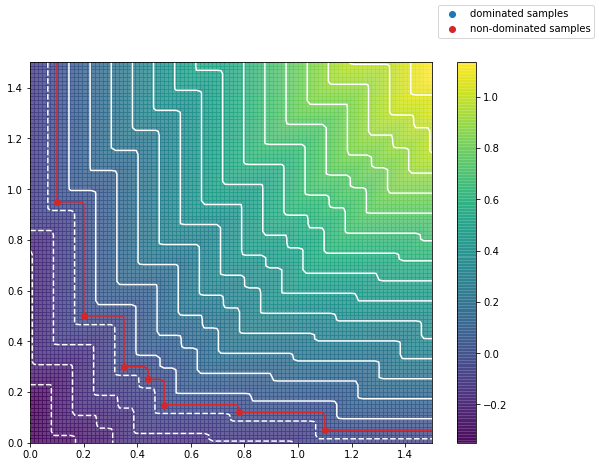

In [4]:
F_saf = lambda x_q: saf(x_q, Pareto_split(y)[0], invert=True)
fig_0 = image_infill(x=y, F=F_saf)

In [7]:
from testsuite.optimisers import SmsEgo
limits = [[0,0,0,0,0], [1, 1, 1, 1, 1]]

F = lambda x: x[:,:2]
sms = SmsEgo(objective_function=F, limits=limits, surrogate=None, n_initial=10,
                 budget=30, seed=None, ref_vector=[2., 2.], log_dir="./log_data",
                 log_interval=None, cmaes_restarts=0)
sms.y = y
sms.n_evaluations = y.shape[0]
sms.current_hv = sms._compute_hypervolume()
# sms.epsilon =np.array([1., 1.]) 

# current pf
# n_pfr = len(Pareto_split(sms.y)[0])
# c = 1 - (1/ 2**sms.n_objectives)
# sms.b_count = 10 
# sms.epsilon = (np.max(sms.y, axis=0) - np.min(sms.y, axis=0))\
#                 /(n_pfr + (c * sms.b_count))

F_sms = lambda x_q: np.array([sms._scalarise_y(xi.reshape(1,-1), 0.00)[0] for xi in x_q])

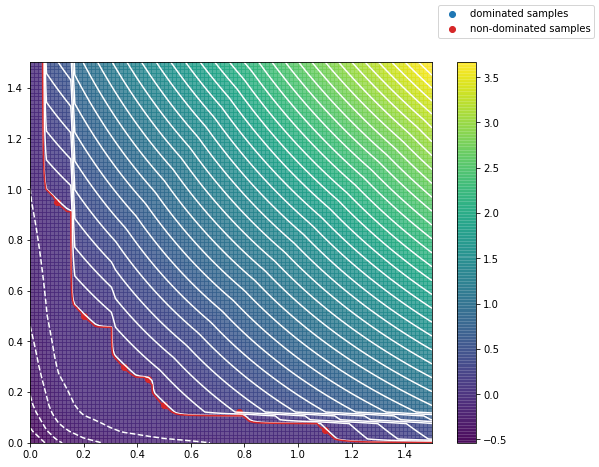

In [8]:
figure_SMS = image_infill(y, F_sms, n_contours=40)